<a href="https://colab.research.google.com/github/ArtMla/ArtMla/blob/main/Predictive_Maintainance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("/content/ai4i2020.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [8]:
#Descriptive Ananlysis
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [9]:
df.shape

(10000, 14)

In [10]:
#Check for missing data
df.isnull().sum()

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Machine failure,0
TWF,0


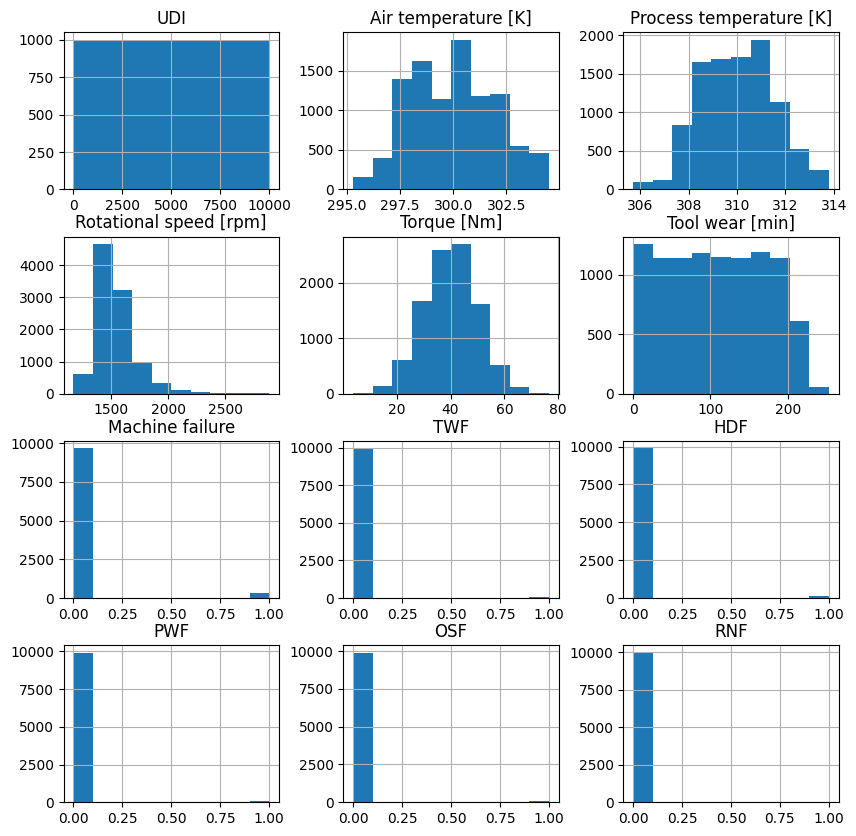

In [11]:
df.hist(figsize=(10,10))
plt.show()

In [12]:
#Class Distribution
df["Machine failure"].value_counts()

,count
Machine failure,
0,9661
1,339


<Axes: xlabel='Machine failure', ylabel='count'>

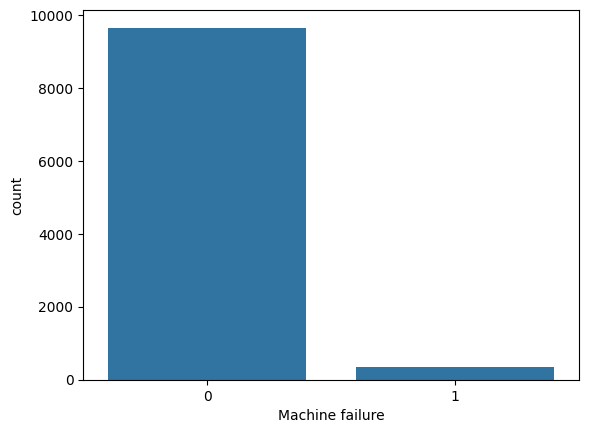

In [13]:
sns.countplot(x="Machine failure", data=df)

In [14]:
#Type of Failure
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [15]:
failure_cols = ['TWF', 'HDF', 'PWF', 'OSF','RNF']
def classify_failure_type (row):
  for col in failure_cols:
    if row[col] == 1:
      return col
  return 'No Failure'

df['Failure type'] = df.apply(classify_failure_type, axis=1)

<Axes: xlabel='Failure type', ylabel='count'>

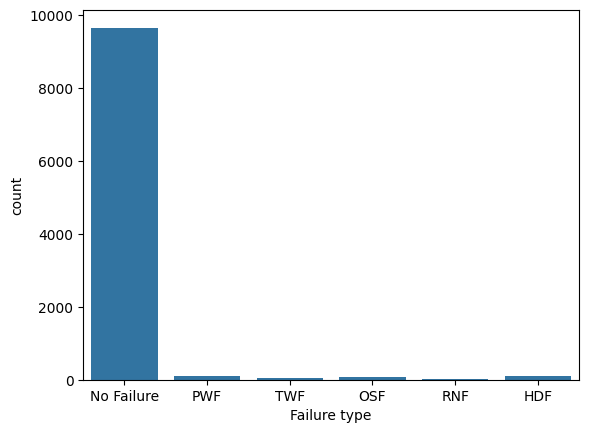

In [16]:
sns.countplot(x='Failure type', data=df)

<Axes: xlabel='Type', ylabel='count'>

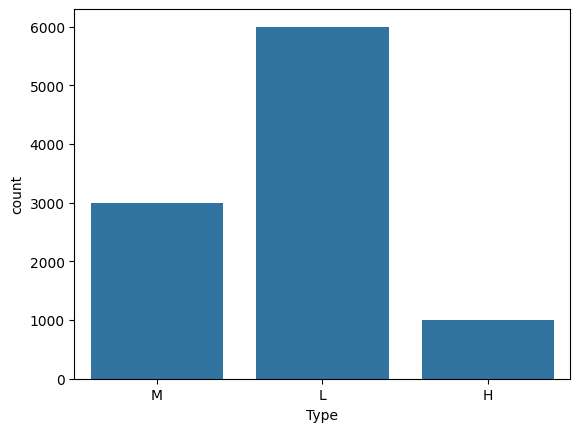

In [17]:
sns.countplot(x='Type', data=df)

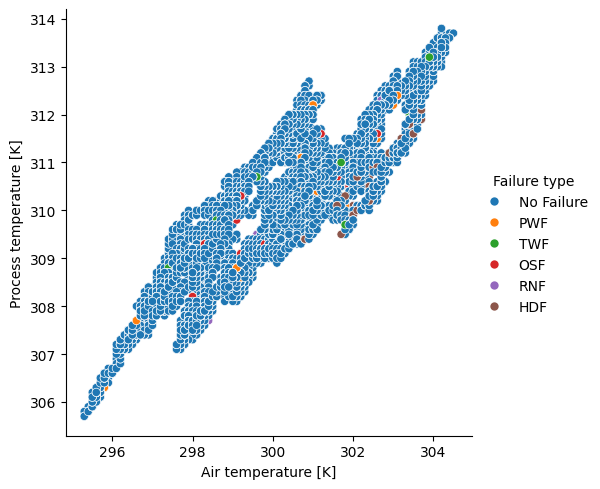

In [18]:
# Plot Temperature at which failures occu
sns.relplot(x="Air temperature [K]", y="Process temperature [K]", data=df, hue="Failure type")

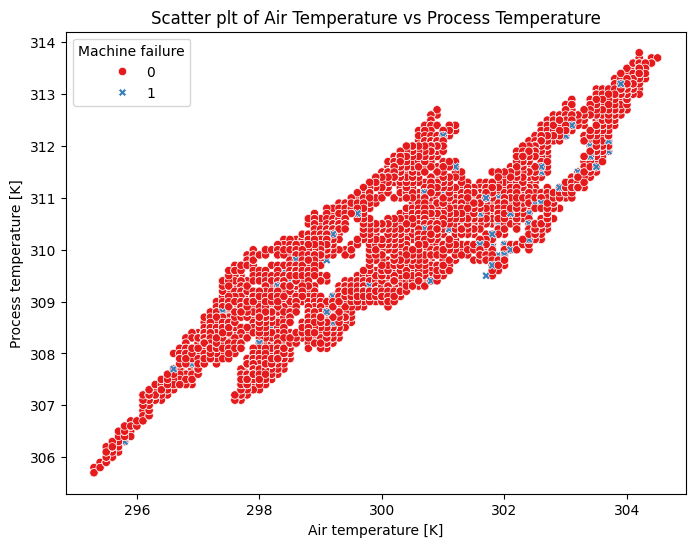

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Air temperature [K]", y="Process temperature [K]",
    hue='Machine failure', style='Machine failure',
    palette='Set1', data=df
)
plt.title('Scatter plt of Air Temperature vs Process Temperature')
plt.show()

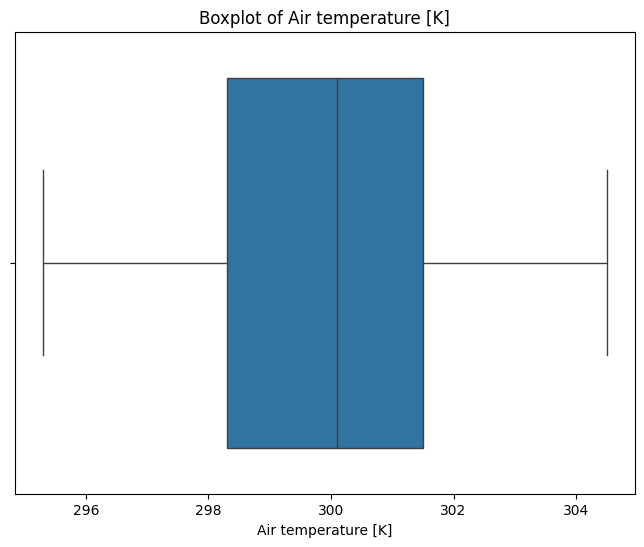

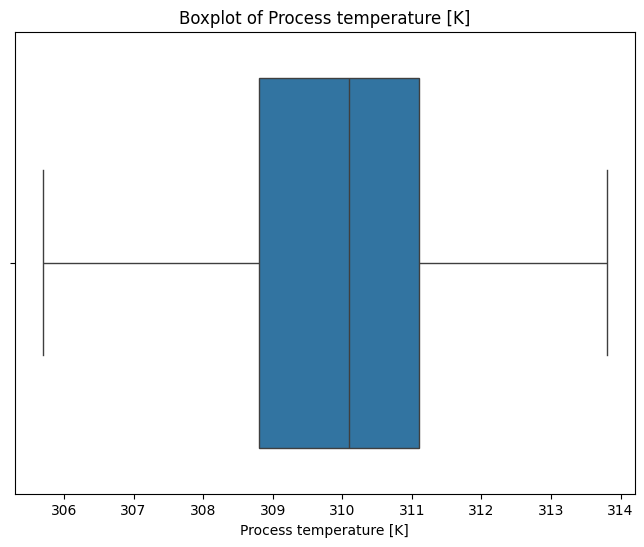

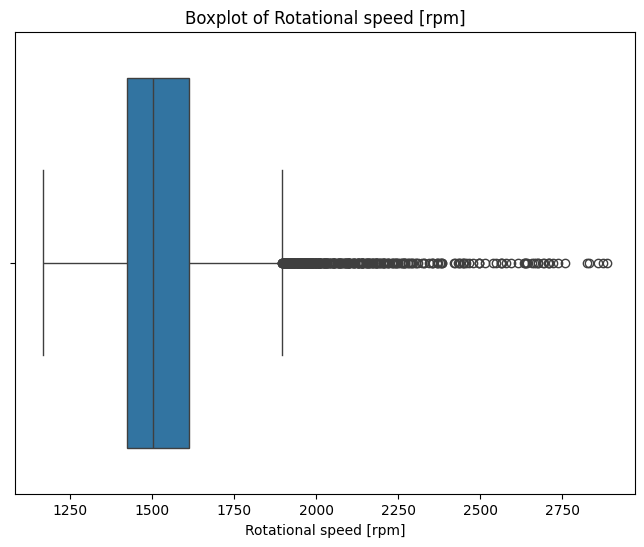

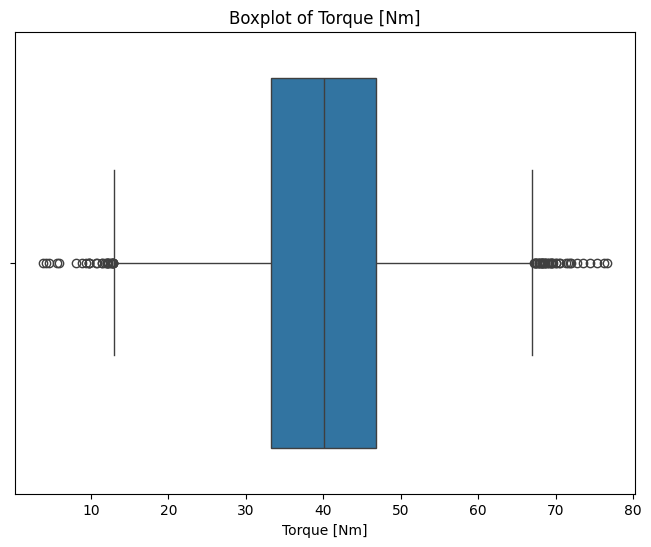

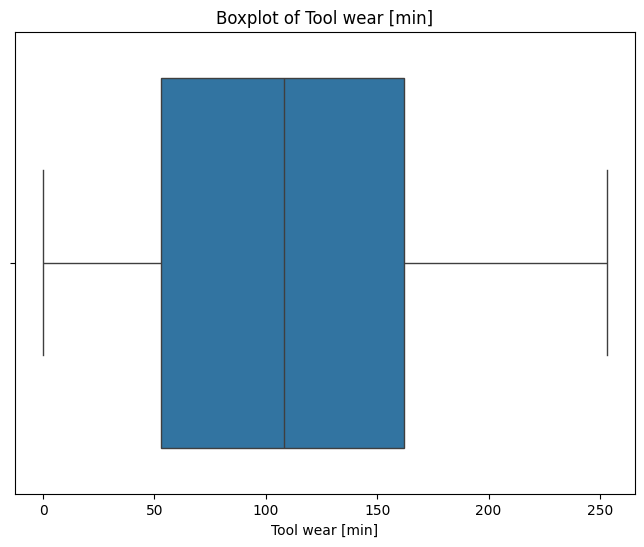

In [20]:
#Outlier detection: Boxplot

sensor_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]',
               'Torque [Nm]','Tool wear [min]']

for col in sensor_cols:
  plt.figure(figsize=(8,6))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()


## Narative
+ torque and rotational speed had more outliers or points outside their normal range quartiles
- do feature importance

Feature Engineering & ML

In [21]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF',
       'Failure type'],
      dtype='object')

In [22]:
df["Type"].unique()

array(['M', 'L', 'H'], dtype=object)

In [23]:
df["Type"] = df["Type"].map({"L":0, "M":1, "H":2})

In [24]:
feature_cols = ['Type', 'Air temperature [K]','Process temperature [K]', 'Rotational speed [rpm]',
                'Torque [Nm]','Tool wear [min]']

Xfeatures = df[feature_cols]
ylabels = df['Machine failure'] #Binary Classification

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [26]:
#Split
X_train, X_test, y_train, y_test = train_test_split(Xfeatures, ylabels, test_size=0.25, random_state=42)

In [27]:
#Build Model
def build_model(classifier, X_train, y_train):
  classifier.fit(X_train, y_train)
  print("Accuracy: ", classifier.score(X_test, y_test))
  return classifier

In [28]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf = build_model(rf, X_train, y_train)

Accuracy:  0.9864


In [29]:
y_pred = rf_clf.predict(X_test)

In [30]:
#Model Evaluation

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2428
           1       0.88      0.61      0.72        72

    accuracy                           0.99      2500
   macro avg       0.93      0.80      0.86      2500
weighted avg       0.99      0.99      0.99      2500



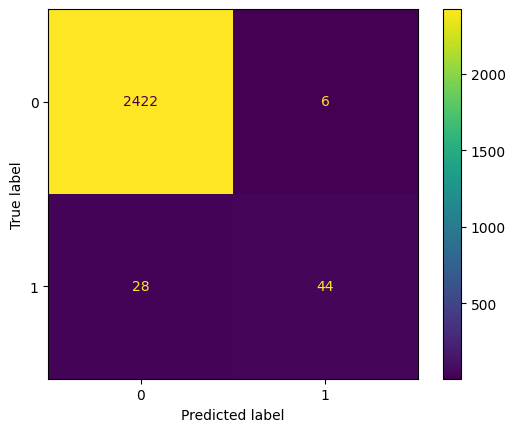

In [31]:
cm = confusion_matrix(y_test, y_pred, labels=rf_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
disp.plot()
plt.show()

In [32]:
#Logistic Regression Model
lr = LogisticRegression()
lr_clf = build_model(lr, X_train, y_train)

Accuracy:  0.9752


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


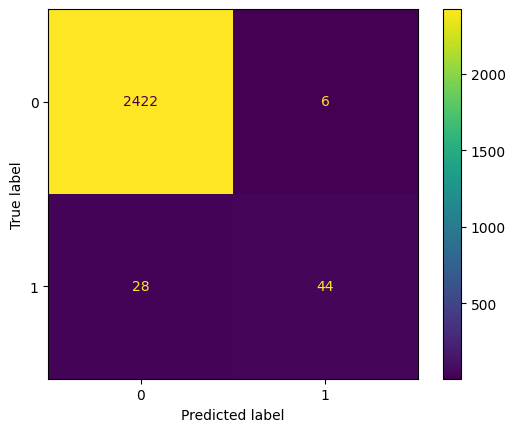

In [33]:
cm = confusion_matrix(y_test, y_pred, labels=rf_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_clf.classes_)
disp.plot()
plt.show()

In [34]:
sample_data = X_test.iloc[20]
print("LR Prediction: ", lr_clf.predict([sample_data]))
print("RF Prediction: ", rf_clf.predict([sample_data]))

LR Prediction:  [0]
RF Prediction:  [0]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [35]:
!pip install eli5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 4.4 MB/s eta 0:00:00


In [36]:
#Show the most important features or weights used for prediction
import eli5
eli5.show_weights(lr_clf, feature_names=Xfeatures.columns.tolist())

Weight?,Feature
+0.835,Air temperature [K]
+0.277,Torque [Nm]
+0.013,Tool wear [min]
+0.011,Rotational speed [rpm]
-0.010,<BIAS>
-0.340,Type
-0.920,Process temperature [K]


In [37]:
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(lr_clf, random_state=42).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=Xfeatures.columns.tolist())


Weight,Feature
0.0820 ± 0.0044,Torque [Nm]
0.0546 ± 0.0105,Rotational speed [rpm]
0.0266 ± 0.0059,Process temperature [K]
0.0258 ± 0.0028,Air temperature [K]
0.0015 ± 0.0031,Tool wear [min]
0.0009 ± 0.0011,Type


In [38]:
#Explain a single prediction
eli5.show_prediction(lr_clf, sample_data, feature_names=Xfeatures.columns.tolist())

In [39]:
X_train, X_test, y_train, y_test = train_test_split(Xfeatures, ylabels, test_size=0.25, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf = build_model(rf, X_train, y_train)

Accuracy:  0.9864


In [40]:
lr_clf = build_model(lr, X_train, y_train)

Accuracy:  0.9752


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
